<a href="https://colab.research.google.com/github/idxakshay/cipher/blob/main/03_1_langfuse_integration_for_tracing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goal of this Notebook

This cookbook demonstrates how [Langfuse](https://langfuse.com/docs) helps to debug, analyze, and iterate on your LangGraph application using the [LangChain integration](https://langfuse.com/integrations/frameworks/langchain).

**By the end of this cookbook, you will be able to:**

*   Automatically trace LangGraph application via the Langfuse integration


In [1]:
!git clone https://github.com/abhinavhada/indexnine-repo-main.git

Cloning into 'indexnine-repo-main'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 104 (delta 7), reused 15 (delta 5), pack-reused 79 (from 1)
Receiving objects: 100% (104/104), 59.15 MiB | 16.22 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Updating files: 100% (71/71), done.


### Steps to Create a Langfuse Account and API Keys on your own

- **Sign Up:**  
  Go to the Langfuse sign-up page: [Sign Up at Langfuse](https://cloud.langfuse.com/auth/sign-up)

- **Set Your Data Region:**  
  Choose the EU or US region as appropriate (EU default: `https://cloud.langfuse.com`, US: `https://us.cloud.langfuse.com`).

- **Create Organization & Project:**  
  After logging in, create a new organization and a project within the Langfuse dashboard.[2]

- **Access API Keys:**  
  In your project, go to **Settings**. You’ll find options to create and copy your API keys (Public Key and Secret Key).

- **Store Keys Securely:**  
  Save the Secret Key and Public Key for later use in your application setup.

***

#### Helpful Langfuse Links

- **Sign up:**  
  [https://cloud.langfuse.com/auth/sign-up](https://cloud.langfuse.com/auth/sign-up)

- **Official Docs:**  
  [https://langfuse.com/docs](https://langfuse.com/docs)

- **API Key Details:**  
  [https://langfuse.com/faq/all/where-are-langfuse-api-keys](https://langfuse.com/faq/all/where-are-langfuse-api-keys)

- **Self-hosting Guide (optional):**  
  [https://langfuse.com/self-hosting](https://langfuse.com/self-hosting)

***

You can always look up or regenerate your API keys by going to your project’s settings in the Langfuse dashboard.  https://langfuse.com/faq/all/where-are-langfuse-api-keys


## Initialize Langfuse

Initialize the Langfuse client with the API key and add them to your environment.

In [2]:
!pip install -r /content/indexnine-repo-main/requirements.txt --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.9/187.9 kB 17.1 MB/s eta

In [4]:
import os
from dotenv import load_dotenv

os.chdir("/content/indexnine-repo-main/")

load_dotenv()

# Get keys for your project from the project settings page: https://cloud.langfuse.com
os.environ["LANGFUSE_PUBLIC_KEY"] = os.getenv("LANGFUSE_PUBLIC_KEY")
os.environ["LANGFUSE_SECRET_KEY"] = os.getenv("LANGFUSE_SECRET_KEY")
os.environ["LANGFUSE_HOST"] = "https://cloud.langfuse.com" # 🇪🇺 EU region
# os.environ["LANGFUSE_HOST"] = "https://us.cloud.langfuse.com" # 🇺🇸 US region

# Your openai key
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

With the environment variables set, we can now initialize the Langfuse client. get_client() initializes the Langfuse client using the credentials provided in the environment variables.

In [8]:
from langfuse import get_client

langfuse = get_client()

# Verify connection
if langfuse.auth_check():
    print("Langfuse client is authenticated and ready!")
else:
    print("Authentication failed. Please check your credentials and host.")

UnauthorizedError: status_code: 401, body: {'message': "Invalid credentials. Confirm that you've configured the correct host."}

### Add Langfuse as callback to the invocation

Now, we will add then [Langfuse callback handler for LangChain](https://langfuse.com/integrations/frameworks/langchain) to trace the steps of our application: `config={"callbacks": [langfuse_handler]}`

In [ ]:
from langfuse.langchain import CallbackHandler

# Initialize Langfuse CallbackHandler for Langchain (tracing)
langfuse_handler = CallbackHandler()

## How to invoke a simple chain with the Langfuse callback handler

### Example : Simple Langchain's LCEL Chain

*   Build a simple LCEL chain that can answer common questions
*   Tracing the chatbot's input and output using Langfuse

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

# Create a simple chain
prompt = ChatPromptTemplate.from_template("Tell me a short story about {topic}")
model = ChatOpenAI(model="gpt-4o-mini") # using a cheap model for demo purposes
output_parser = StrOutputParser()

chain = prompt | model | output_parser

# Invoke the chain with the Langfuse callback handler
response = chain.invoke({"topic": "a dog"}, config={"callbacks": [langfuse_handler]})

print(response)

Once in a small town, there lived a cheerful golden retriever named Max. Max had a sunny disposition and loved nothing more than to run through the fields, chase after butterflies, and make friends with everyone he met.

One day, while exploring a new part of the park, Max stumbled upon a small, shiny object half-buried in the grass. Curious, he dug it out with his paws and uncovered a beautiful locket. It was heart-shaped and had intricate designs carved into its surface. Excited by his find, Max picked it up gently and trotted home.

At the time, Emily, a young girl who lived in his neighborhood, was feeling a little sad. She had lost her grandmother a few months earlier, and the locket reminded her of the one her grandmother always wore. Max, sensing her sadness, dropped the locket at her feet and wagged his tail energetically.

"What's this?" Emily said, her eyes shining with curiosity. As she opened the locket, a warm picture of her grandmother smiled back at her, and she felt an 

### View traces in Langfuse

Trace for the above example

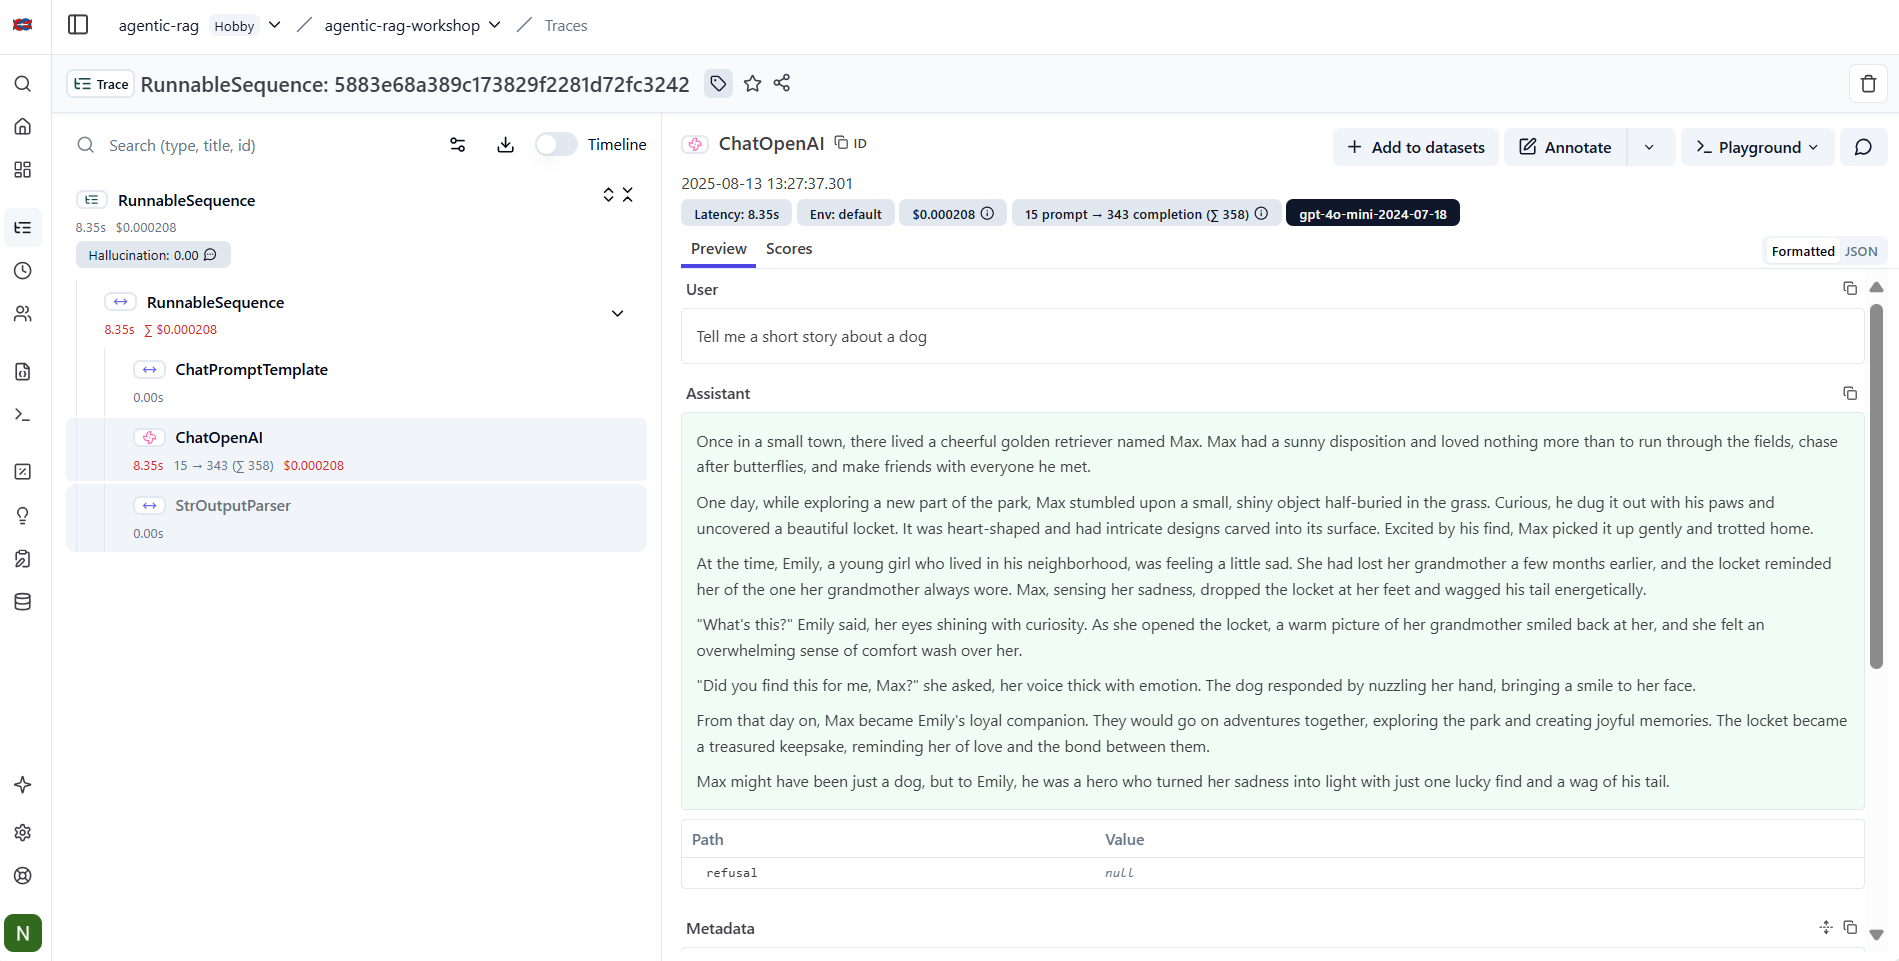

## How to invoke a graph with the Langfuse callback handler

### Example : Simple chat app with LangGraph

*   Build a support chatbot in LangGraph that can answer common questions
*   Tracing the chatbot's input and output using Langfuse

### Create Agent

Start by creating a `StateGraph`. A `StateGraph` object defines our chatbot's structure as a state machine. We will add nodes to represent the LLM and functions the chatbot can call, and edges to specify how the bot transitions between these functions.

In [ ]:
from typing import Annotated

from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages

class State(TypedDict):
    # Messages have the type "list". The `add_messages` function in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

llm = ChatOpenAI(model = "gpt-4o", temperature = 0.2)

# The chatbot node function takes the current State as input and returns an updated messages list. This is the basic pattern for all LangGraph node functions.
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

# Add a "chatbot" node. Nodes represent units of work. They are typically regular python functions.
graph_builder.add_node("chatbot", chatbot)

# Add an entry point. This tells our graph where to start its work each time we run it.
graph_builder.set_entry_point("chatbot")

# Set a finish point. This instructs the graph "any time this node is run, you can exit."
graph_builder.set_finish_point("chatbot")

# To be able to run our graph, call "compile()" on the graph builder. This creates a "CompiledGraph" we can use invoke on our state.
graph = graph_builder.compile()

In [ ]:
for s in graph.stream({"messages": [HumanMessage(content = "What is Langfuse?")]},
                      config={"callbacks": [langfuse_handler]}):
    print(s)

# or you can also use it this way:
# graph = builder.compile().with_config({"callbacks": [langfuse_handler]})

{'chatbot': {'messages': [AIMessage(content='Langfuse is a platform designed to help developers and companies monitor, debug, and improve their AI applications, particularly those that involve natural language processing (NLP) and large language models (LLMs). It provides tools for tracking the performance and behavior of AI models in real-time, allowing users to gain insights into how their models are interacting with users and where improvements can be made. Langfuse typically offers features such as logging, analytics, and visualization to help users understand and optimize their AI-driven applications.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 102, 'prompt_tokens': 13, 'total_tokens': 115, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'sy

### View traces in Langfuse

Trace for the above example

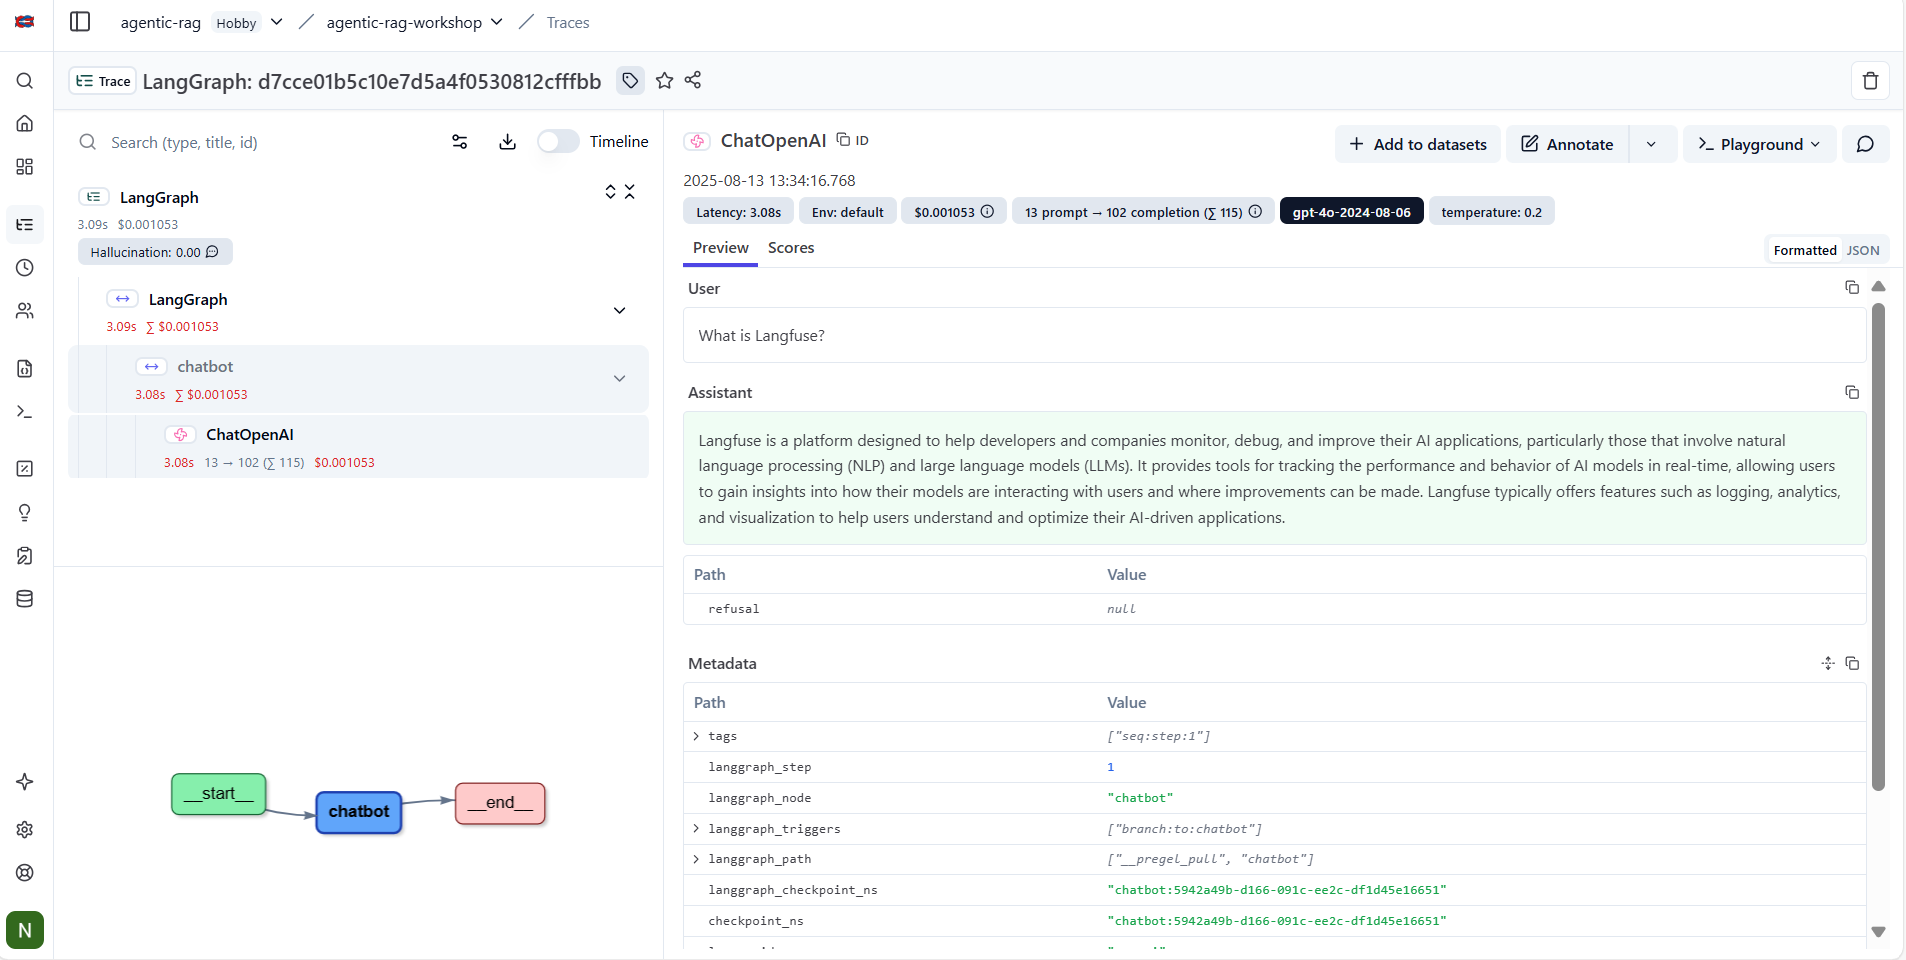